# 哈希

哈希表，也叫做散列表，它是基于快速存取信息而设计的，是一种典型的“空间换时间”的做法。哈希表是普通数组的一种推广，因为数组可以直接寻址，因此可以在$O(1)$时间内访问任意元素。

哈希表是根据关键字而直接进行访问的数据结构。也就是说，它将关键字通过某种规则映射到数组的某个位置，以加快查找速度。这个映射规则被称为**哈希函数**，存放记录的数组被称为**哈希表**。哈希表建立了关键字和存储地址之间的一种映射关系。

若多个不同的关键字通过哈希函数计算得到相同的数组下标，则称其发生了**冲突**，这些发生冲突的不同关键字称为**同义词**。一方面，设计好的Hash函数应该尽量减少这样的冲突；另一方面，由于这样的冲突总是不可避免的，所以还要设计好处理冲突的办法。

## 哈希函数

所有的散列函数都有如下一个基本特性：如果两个散列值是不相同的（根据同一函数），那么这两个散列值的原始输入也是不相同的。这个特性使得散列函数具有确定性的结果，具有这种特性的散列函数被称为单向散列函数。常用的哈希函数有以下几种：

* MD4

* MD5

* SHA-1

## 处理冲突的办法

任何Hash函数都不可能绝对避免冲突，为此必须考虑冲突发生时应该如何进行处理，即为产生冲突的关键字寻找下一个“空”的Hash地址，大体上有以下几种方法：

* 链地址法：链地址法是指把所有的冲突关键字（同义词）存储在一个线性链表中，这个链表由其散列地址唯一标识。

* 开放地址法：开放地址法是指可存放新表项的空闲地址，既向它的同义词表项开放，又向它的非同以词开放。其数学递推公式为：$$H_{i}=(H(key)+d_{i})\% m$$式中：$i=1,2,...,k(k \leq m-1)$，$m$为散列表长，$d_{i}$为增量序列，根据$d_{i}$的不同选择可以将开放地址法分为线性探查，随即探查或者二次探查。

* 再散列法：当发生冲突的时候，利用另一个哈希函数再进行计算，直到冲突不再发生为止，这种方法被称作是再哈希法。

* 建立一个公共溢出区：一旦由哈希函数得到的地址冲突就都填入溢出表。

针对上面的第二点**开放地址法**在这里有一个例子，这个例子是应用**线性探查法**：

>已知一个线性表`(38,25,74,63,52,48)`，假定采用散列函数$h(key)=key\%7$计算散列地址，并散列存储在散列表`A[0...6]`中，若采用线性探测方法解决冲突，则在该散列表上进行等概率成功查找的平均查找长度为多少？

针对以上问题可以先让线性表使用散列函数得到Hash值，分别为：`3,4,4,0,3,6`。与此同时构造出散列表：

|位置|0|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|记录|63|48|-|38|25|74|52|
|查找次数|1|3|-|1|1|2|4|

以74为例：74本应该在下标为4的位置上，由于25已经放在这个地方上，根据线性探测法的规定74需要向后移动，放在了下标5的位置上，52和48同理。由于是等概率查找，所以平均查找长度为：$$\frac{1}{6}*(1+3+1+1+2+4)=2.0$$

## 一致性哈希

这种Hash是被用在集群上的，众所周知当一个集群存储了非常多的数据的时候，不同的数据往往存放在不同的节点上。而数据存放在哪个节点上往往就是由该数据的键进行Hash得到的。但是一旦某个节点宕机需要退出集群时，为了保证数据的可用性就不得不对数据进行重Hash，由于少了一个节点，这种Hash的结果往往和之前的节点还在的时候的结果大不相同，这样就会造成非常大的数据迁移代价。一致性Hash就是为了解决这样的为题而诞生的。

试想有这样一个Hash函数，它的哈希空间（也就是其Hash值构成的空间）是一个32位的无符号整形，这些Hash值可以视为一个逻辑上的圆环：

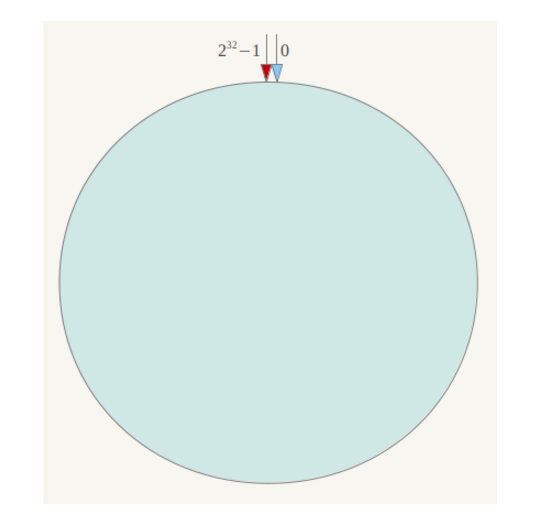

这样，再将各个数据的键进行Hash，将各个主机的IP或者主机名作为键也进行Hash，将结果反映在圆环上：

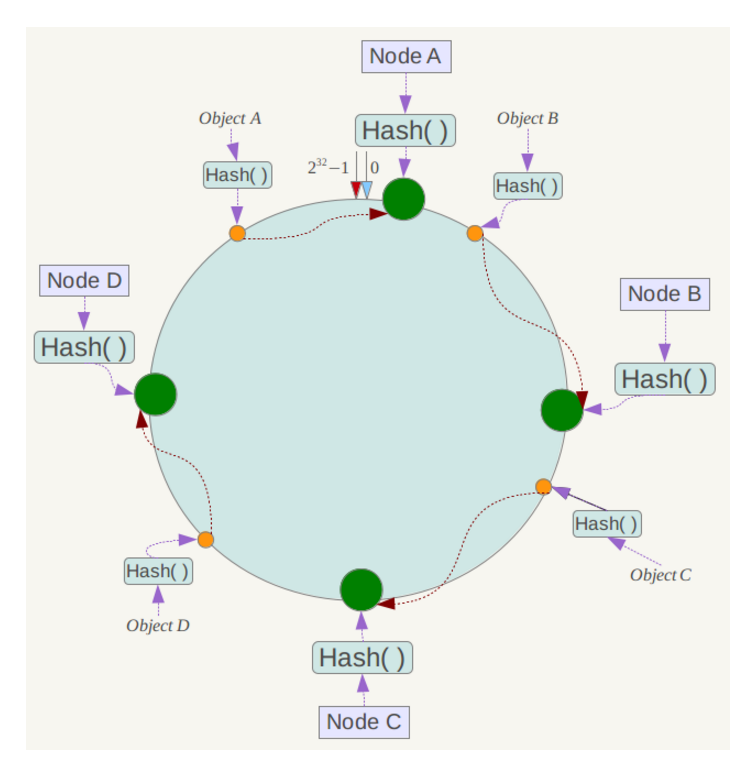

现在，从圆环的某一点出发顺时针（或逆时针）沿着圆环行走，每当经过一个节点的Hash值时，在这之前经过的数据项就都存放于这个节点上。这样的设计使得即使损失或增加了一个节点，数据也不会因为重Hash而大范围地重传。为了解决数据分布不均匀的问题，可以引入虚拟节点的设定，这样的设计是说针对每个节点设计一个或多个虚拟节点，这些虚拟节点和其对应的实际节点有着不一样的Hash值，但是所有被保存在虚拟节点上的数据都会被实际存储在其对应的实际节点上。